<a href="https://colab.research.google.com/github/jjiho/20141001-Lee-Jiho/blob/master/Assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

import math


1. Load and plot the dataset (dataset-noise-02.txt)

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
Number of the training data = 200
Shape of the training data = (200, 3)
Data type of the training data = float64


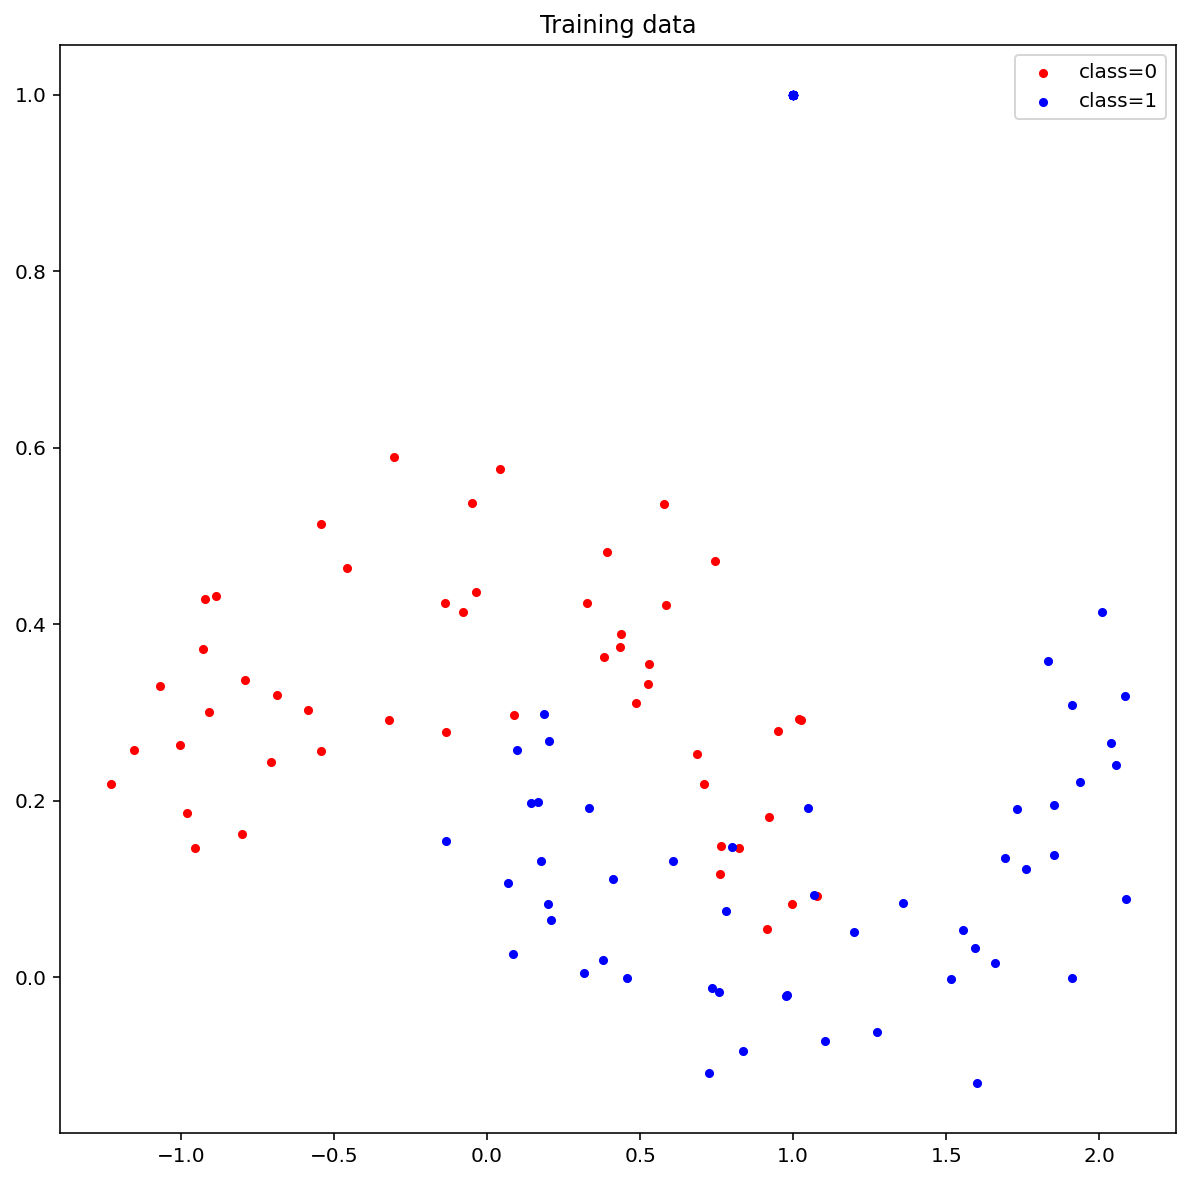

Number of the testing data = 200
Shape of the testing data = (200, 3)
Data type of the testing data = float64


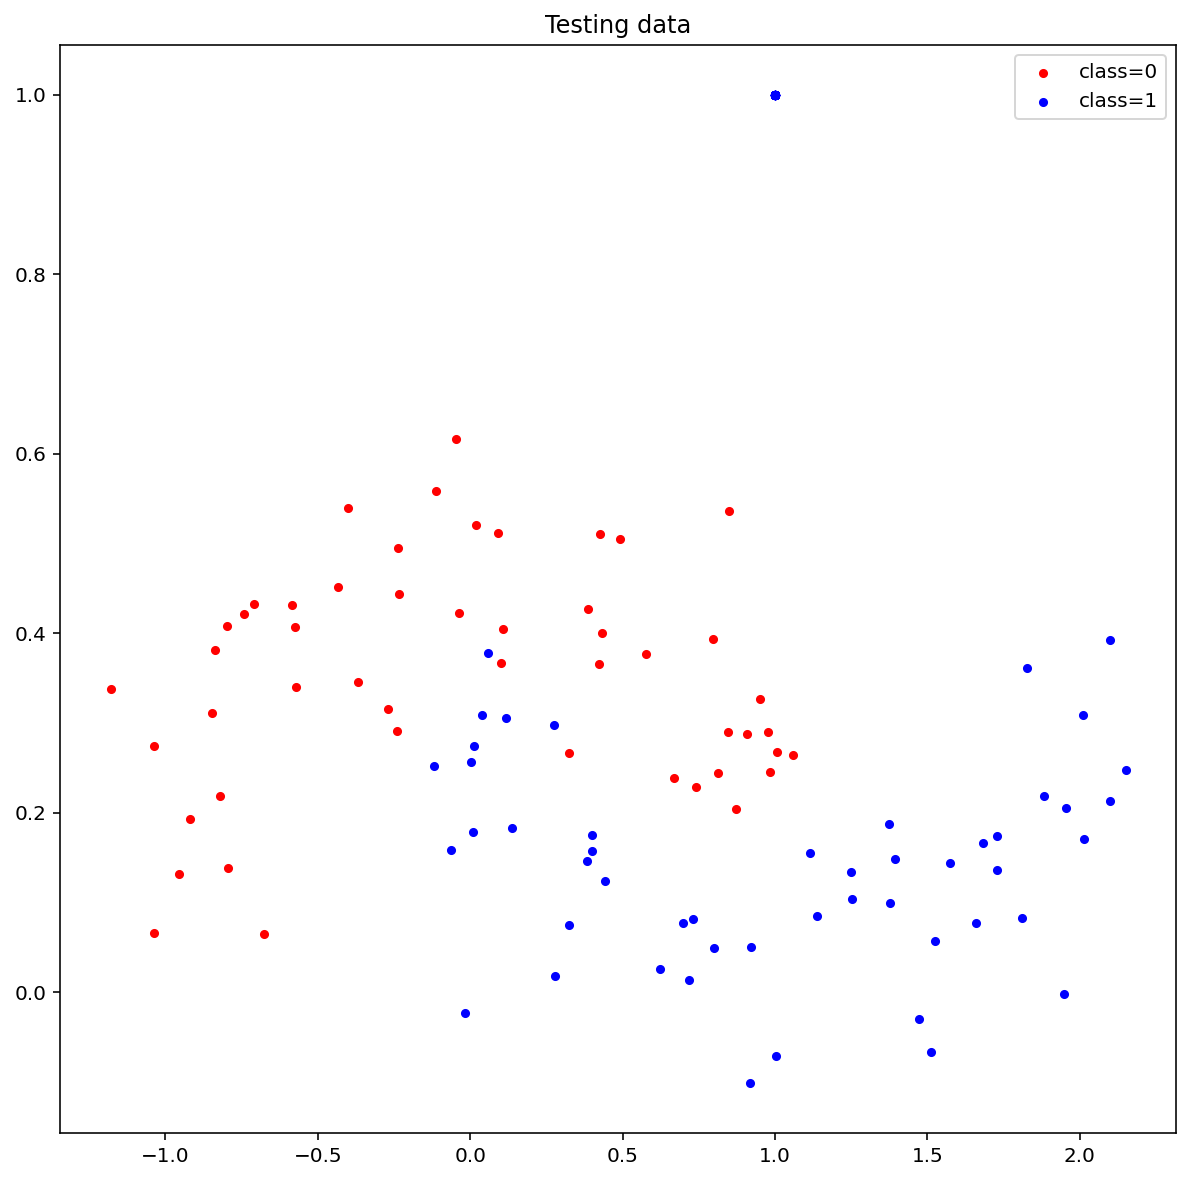

In [13]:
# import data with numpy
from google.colab import drive
drive.mount('/content/gdrive/')

training_data = np.loadtxt('/content/gdrive/My Drive/training.txt', delimiter=',')
testing_data = np.loadtxt('/content/gdrive/My Drive/testing.txt', delimiter=',')

# number of training data
n = training_data.shape[0] 
print('Number of the training data = {}'.format(n))
print('Shape of the training data = {}'.format(training_data.shape))
print('Data type of the training data = {}'.format(training_data.dtype))

# plot the training_data
x1 = training_data[:,0] # feature 1
x2 = training_data[:,1] # feature 2
idx = training_data[:,2] # label 

idx_class0 =  (training_data[:,2]==0)# index of class0
idx_class1 =  (training_data[:,2]==1)# index of class1

plt.figure(1,figsize=(10,10))
plt.scatter(x1[idx_class0], x2[idx_class0] , s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1[idx_class1], x2[idx_class1] , s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

# number of testing data
n2 = testing_data.shape[0] 
print('Number of the testing data = {}'.format(n2))
print('Shape of the testing data = {}'.format(testing_data.shape))
print('Data type of the testing data = {}'.format(testing_data.dtype))

#plot testing_data
t_x1 = testing_data[:,0] # feature 1
t_x2 = testing_data[:,1] # feature 2
t_idx = testing_data[:,2] # label 

t_idx_class0 =  (testing_data[:,2]==0)# index of class0
t_idx_class1 =  (testing_data[:,2]==1)# index of class1

plt.figure(2,figsize=(10,10))
plt.scatter(t_x1[t_idx_class0], t_x2[t_idx_class0] , s=50, c='r', marker='.', label='class=0') 
plt.scatter(t_x1[t_idx_class1], t_x2[t_idx_class1] , s=50, c='b', marker='.', label='class=1')
plt.title('Testing data')
plt.legend()
plt.show()

## 2. Define a logistic regression loss function and its gradient
<hr>

In [19]:
# sigmoid function
def sigmoid(z):
    sigmoid_f = 1 / (1 + np.exp(-z)) 
    return sigmoid_f 


# predictive function definition
def f_pred(X,w): 
    p = sigmoid(np.dot(X, w))
    return p


# loss function definition
def loss_logreg(y_pred,y): 
    n = len(y)
    loss = (-np.dot(y.transpose(), np.log(y_pred+np.exp(-64))) - np.dot((1-y).transpose(), np.log(1-y_pred + np.exp(-64)))) / n
    return loss


# gradient function definition
def grad_loss(y_pred,y,X):
    n = len(y)
    grad = (2 / n) * np.dot(X.transpose(), (y_pred - y))
    return grad


# gradient descent function definition
def grad_desc(X, y, w_init, lamb, tau=1e-3, max_iter=100000):
    L_iters = np.zeros([max_iter]) # record the loss values
    w_iters = np.zeros([max_iter,2]) # record the loss values
    w = w_init # initialization
    
    for i in range(max_iter): # loop over the iterations
        
        y_pred = f_pred(X, w) # linear predicition function
        grad_f = grad_loss(y_pred,y,X) # gradient of the loss 
        w = (1-tau * lamb) * w - tau * grad_f # update rule of gradient descent 
        L_iters[i] = loss_logreg(y_pred,y) # save the current loss value 
        w_iters[i,:] = w[0],w[1] # save the current w value 
        
    return w, L_iters

## 3. define a prediction function and run a gradient descent algorithm
<hr>


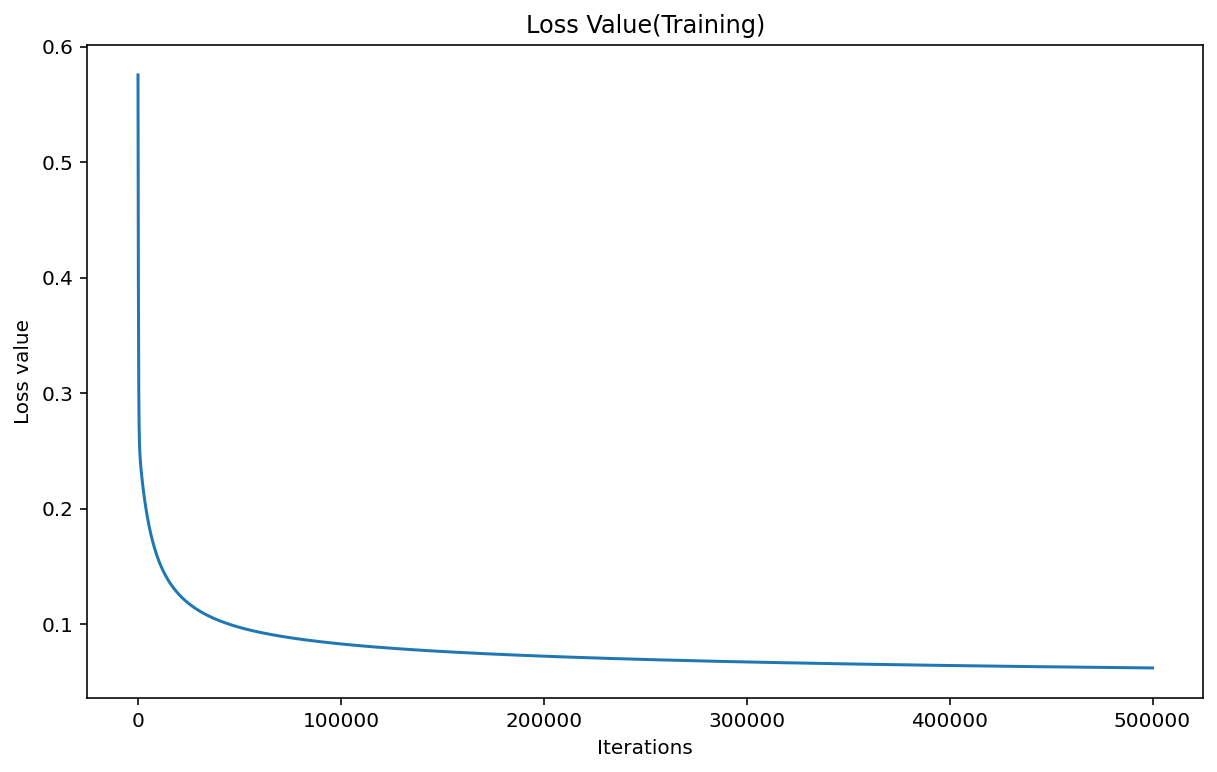

In [21]:
import math
def func_g(x1, x2):
  X = np.zeros((n, 100))
  for k in range(n):
    for i in range(10):
      for j in range(10):
        X[k][i * 10 + j] = x1[k]**i * x2[k]**j
  return X

start = time.time()
w_init = np.random.rand(100, 1)
X = func_g(x1, x2)

y = training_data[:,2][:,None] # label
tau = 1e-2; max_iter = 500000
lamb = 0.00001
w, L_iters = grad_desc(X, y, w_init, lamb, tau, max_iter)

plt.figure(3, figsize = (10, 6))
plt.title('Loss Value(Training)')
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 4. Plot the decisoin boundary
<hr>

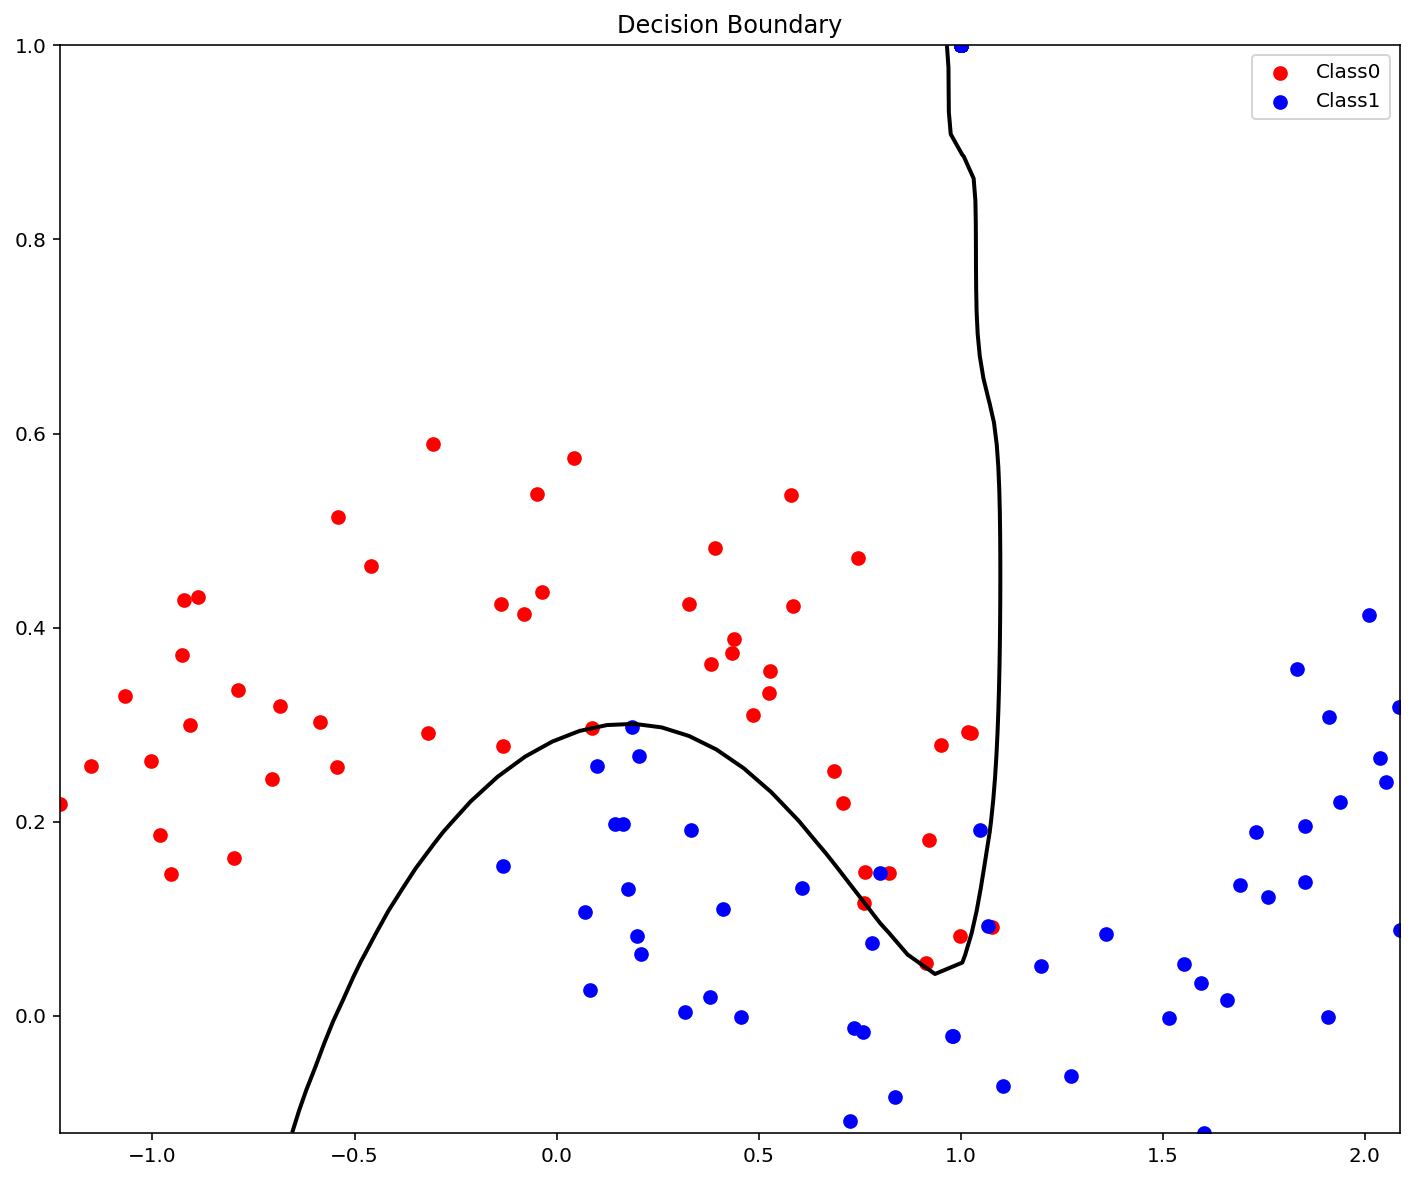

In [32]:
# compute values p(x) for multiple data points x
x1_min, x1_max = x1.min(), x1.max() # min and max of grade 1
x2_min, x2_max = x2.min(), x2.max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid

def calculate_X2(x1, x2):
  X = np.ones([2500, 100])
  for i in range(2500):
    for j in range(10):
      for k in range(10):
        X[:,j*10 + k] = (x1**(j) * x2**(k)).reshape(2500)
  return X

X2 = calculate_X2(xx1, xx2)
Z = f_pred(X2, w)
Z = Z.reshape(50, 50)


# plot

plt.figure(4,figsize=(12,10))
plt.scatter(x1[idx_class0], x2[idx_class0], color = 'red', label = 'Class0', s = 40) 
plt.scatter(x1[idx_class1], x2[idx_class1], color = 'blue', label = 'Class1', s = 40) 
plt.contour(xx1, xx2, Z, levels = [0.5], linewidths = 2, colors = 'k') 

#ax = plt.contourf(xx1,xx2,p,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
#cbar = plt.colorbar(ax)
#cbar.update_ticks()

plt.legend()
plt.title('Decision Boundary')
plt.show()

## 5. Plot the probability map
<hr>

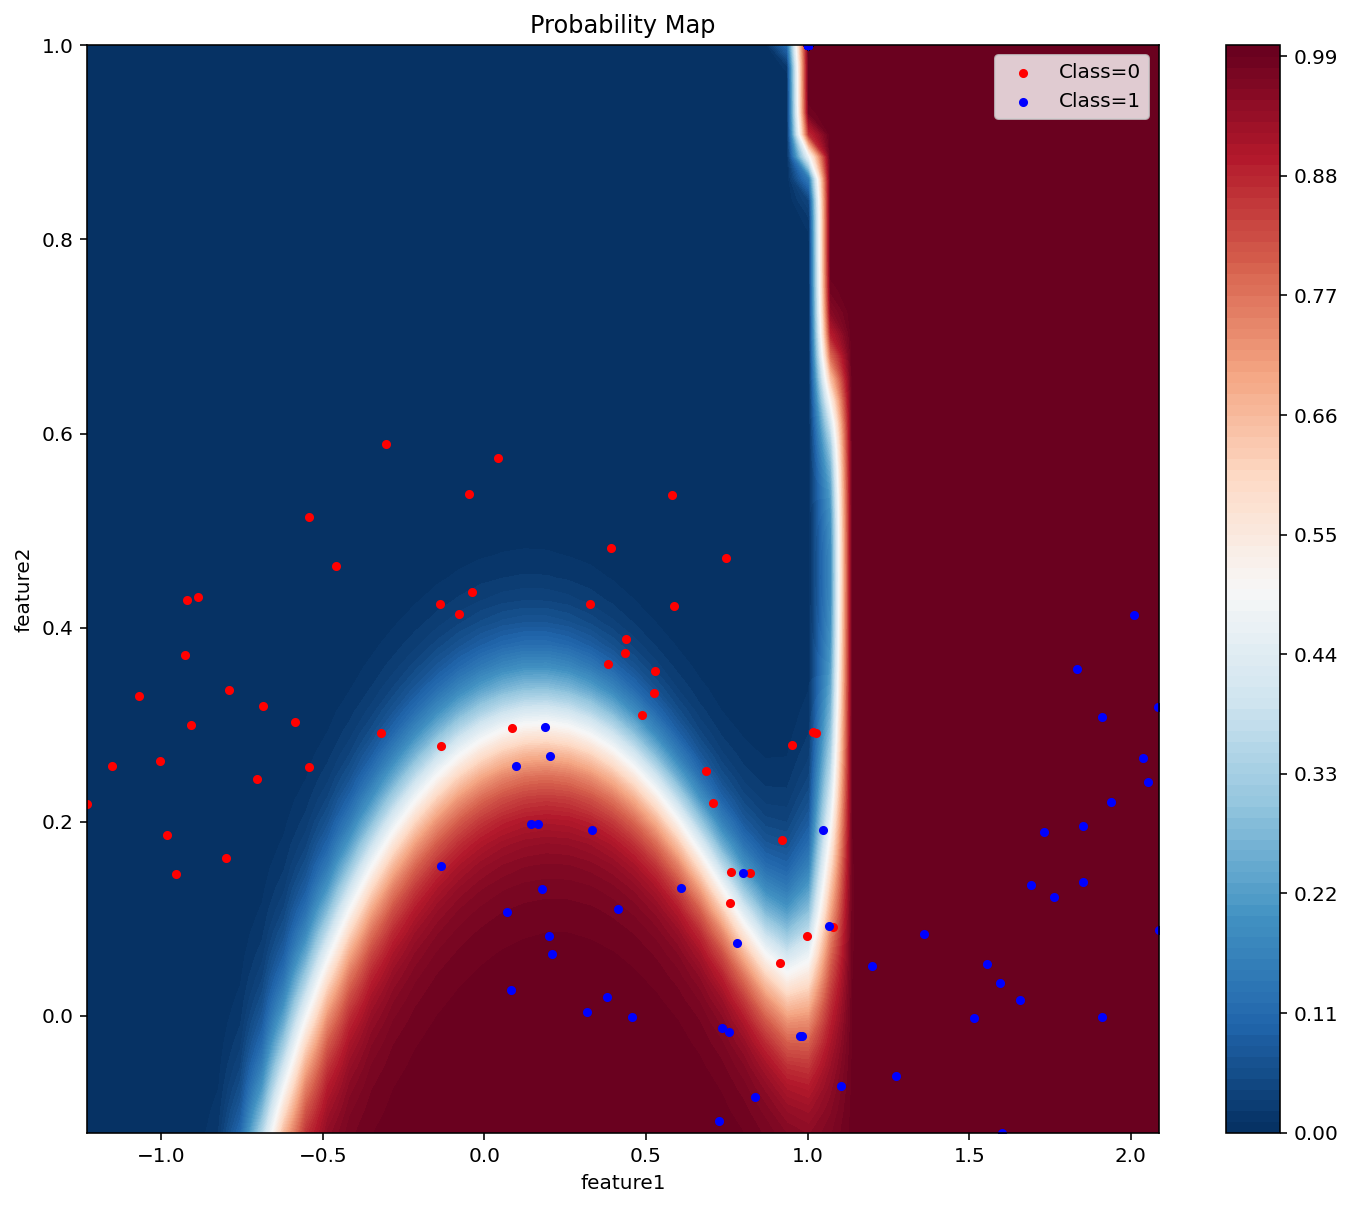

In [33]:
# compute values p(x) for multiple data points x
x1_min, x1_max = x1.min(), x1.max() # min and max of grade 1
x2_min, x2_max = x2.min(), x2.max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid

Z = f_pred(calculate_X2(xx1, xx2), w)
Z = Z.reshape(50, 50)

# plot
fig = plt.figure(4,figsize=(12,10))

ax = fig.add_subplot(111)
ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 10)

ax.set_xlabel('feature1')
ax.set_ylabel('feature2')

cf = ax.contourf(xx1, xx2, Z, cmap = plt.cm.RdBu_r, levels = 100)
#cf = ax.contourf(xx1, xx2, Z, cmap = plt.cm.RdBu_r, levels = np.arange(0, 1, 0.01))
ax.scatter(x1[idx_class0], x2[idx_class0] , s=50, c='r', marker='.', label='Class=0')
ax.scatter(x1[idx_class1], x2[idx_class1] , s=50, c='b', marker='.', label='Class=1')

cbar = fig.colorbar(cf)
cbar.update_ticks()

plt.legend()
plt.title('Probability Map')
plt.show()

## 6. Compute the classification accuracy
<hr>

In [37]:
# compute the accuracy of the classifier
n = training_data.shape[0]

# plot
p = f_pred(X, w)

idx_class1_pred = (p[:] >= 0.5)
idx_class1_label = (training_data[:,2 >= 0.5])
print(idx_class1_label.shape)

count = 0
for i in range(len(idx_class1_pred)):
  if idx_class1_pred[i] and idx_class1_label[i][0][2]:
    count += 1

for i in range(len(idx_class1_pred)):
  if idx_class1_pred[i] == 0 and idx_class1_label[i][0][2] == 0:
    count += 1

#print(idx_class1_label)
#print(idx_class1_pred)

#print(np.sum(idx_wrong))
print('total number of correctly classified data = ', (count))
print('accuracy(%) = ',  count / n * 100)

(200, 1, 3)
total number of correctly classified data =  196
accuracy(%) =  98.0
